# Load Libraries

In [1]:
import rpy2.interactive 
import rpy2.interactive.packages
%load_ext rpy2.ipython

# Directly convert objects from pandas to r and vsv
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set the global figure size
plt.rcParams['figure.figsize'] = (8.0, 8.0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%R
library(ggplot2)
library(dplyr)
library(gridExtra)

# Load the Data

In [3]:
%%R
pf <-read.csv('~/Data-Science/dand/exploratory_data_analysis/lesson3/pseudo_facebook.tsv', sep='\t')
head(pf)
names(pf)
summary(pf)

     userid             age            dob_day         dob_year   
 Min.   :1000008   Min.   : 13.00   Min.   : 1.00   Min.   :1900  
 1st Qu.:1298806   1st Qu.: 20.00   1st Qu.: 7.00   1st Qu.:1963  
 Median :1596148   Median : 28.00   Median :14.00   Median :1985  
 Mean   :1597045   Mean   : 37.28   Mean   :14.53   Mean   :1976  
 3rd Qu.:1895744   3rd Qu.: 50.00   3rd Qu.:22.00   3rd Qu.:1993  
 Max.   :2193542   Max.   :113.00   Max.   :31.00   Max.   :2000  
                                                                  
   dob_month         gender          tenure        friend_count   
 Min.   : 1.000   female:40254   Min.   :   0.0   Min.   :   0.0  
 1st Qu.: 3.000   male  :58574   1st Qu.: 226.0   1st Qu.:  31.0  
 Median : 6.000   NA's  :  175   Median : 412.0   Median :  82.0  
 Mean   : 6.283                  Mean   : 537.9   Mean   : 196.4  
 3rd Qu.: 9.000                  3rd Qu.: 675.0   3rd Qu.: 206.0  
 Max.   :12.000                  Max.   :3139.0   Max.   :4923

In [4]:
%R summ <- str(pf)  

'data.frame':	99003 obs. of  15 variables:
 $ userid               : int  2094382 1192601 2083884 1203168 1733186 1524765 1136133 1680361 1365174 1712567 ...
 $ age                  : int  14 14 14 14 14 14 13 13 13 13 ...
 $ dob_day              : int  19 2 16 25 4 1 14 4 1 2 ...
 $ dob_year             : int  1999 1999 1999 1999 1999 1999 2000 2000 2000 2000 ...
 $ dob_month            : int  11 11 11 12 12 12 1 1 1 2 ...
 $ gender               : Factor w/ 2 levels "female","male": 2 1 2 1 2 2 2 1 2 2 ...
 $ tenure               : int  266 6 13 93 82 15 12 0 81 171 ...
 $ friend_count         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ friendships_initiated: int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes_received       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes_received: int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes_received   : int  0 0 0

Trying to capture the  output of str in R but it does not work

In [5]:
%R summ

In [6]:
pf = pd.read_csv('~/Data-Science/dand/exploratory_data_analysis/lesson3/pseudo_facebook.tsv', sep='\t')
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [7]:
pf.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


## What would I do if I wanted to pass the dataframe to R and use some of it's reporting features?

It is not really possible to transfer efficient objects form python to R. It only works from R->python  
the solution is to save to disk and have R read it from there. 
Let's give it a try

In [8]:
tpf = pf.copy()
tpf.to_csv('tpf', index=False)

In [9]:
%%R
tpf <-read.csv('tpf', header=TRUE, sep=",", dec=",")

In [10]:
%%R
str(tpf)

'data.frame':	99003 obs. of  15 variables:
 $ userid               : int  2094382 1192601 2083884 1203168 1733186 1524765 1136133 1680361 1365174 1712567 ...
 $ age                  : int  14 14 14 14 14 14 13 13 13 13 ...
 $ dob_day              : int  19 2 16 25 4 1 14 4 1 2 ...
 $ dob_year             : int  1999 1999 1999 1999 1999 1999 2000 2000 2000 2000 ...
 $ dob_month            : int  11 11 11 12 12 12 1 1 1 2 ...
 $ gender               : Factor w/ 3 levels "","female","male": 3 2 3 2 3 3 3 2 3 3 ...
 $ tenure               : Factor w/ 2427 levels "","0.0","1.0",..: 1601 1984 337 2351 2229 559 226 2 2218 793 ...
 $ friend_count         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ friendships_initiated: int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes_received       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes_received: int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes            : int  0 0 0 0 

In [11]:
%ls

Bivariate_EDA.ipynb                        README.md
Bivariate_EDA_Problem_Set.ipynb            tpf
LICENSE                                    tpf.csv
Multivariate_EDA_Lessons+ProblemSet.ipynb


# Simple Histogram

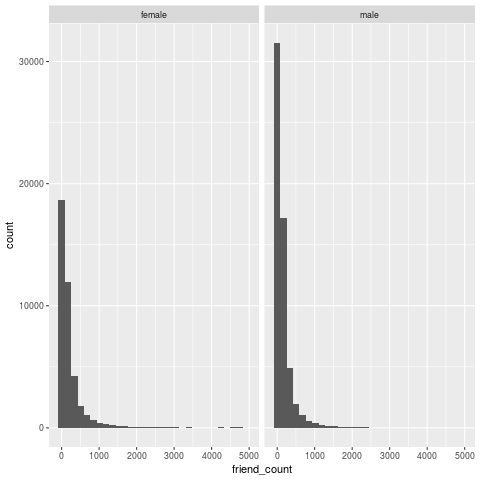

In [12]:
%%R
ggplot(aes(x = friend_count, color=age),
       data = subset(pf, !is.na(gender))) + geom_histogram() +
facet_wrap(~gender, ncol=2)

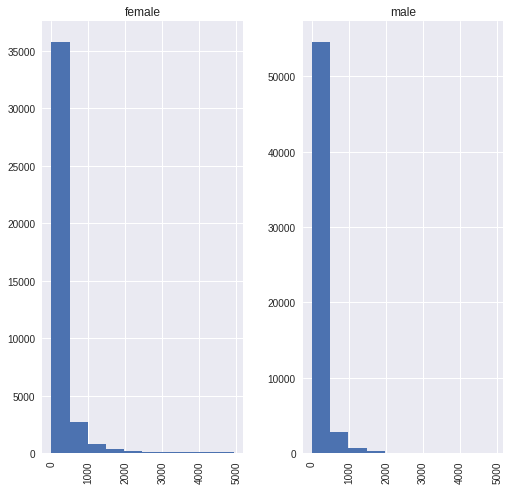

In [13]:
pf.hist(column='friend_count', by='gender');

# Third Qualitative Variable

## Boxplots

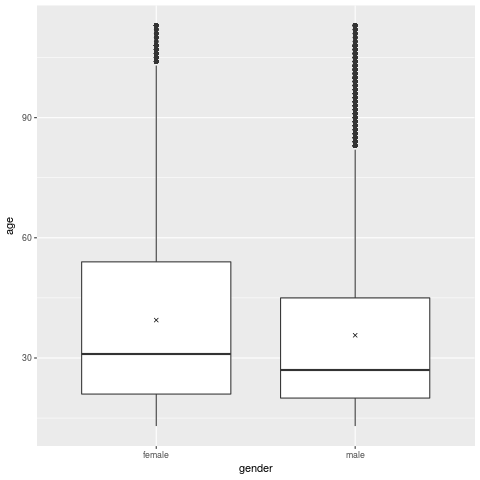

In [14]:
%%R
# Make two boxplots
ggplot(aes(x = gender, y = age),
       data = subset(pf, !is.na(gender))) + 
  geom_boxplot() +
  #add the mean as an x (shape = 4)
  stat_summary(fun.y = mean, geom = 'point', shape = 4)

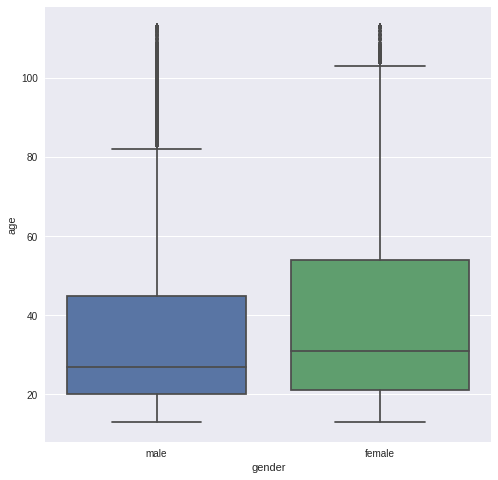

In [15]:
sns.boxplot(x='gender', y='age', data=pf);

## Lineplots

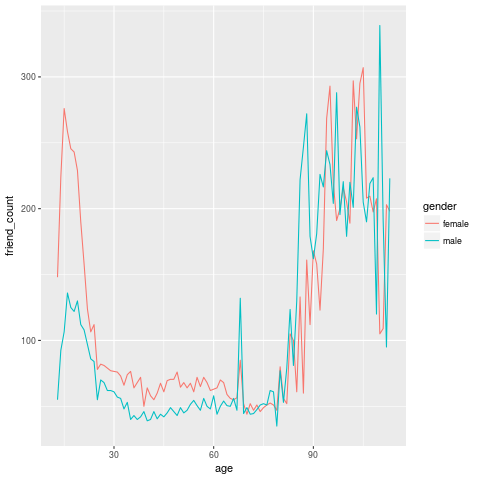

In [16]:
%%R
# Make a lineplot
ggplot(aes(x = age, y = friend_count),
       data = subset(pf, !is.na(gender))) + 
  geom_line(aes(color=gender), stat = 'summary', fun.y = median) 

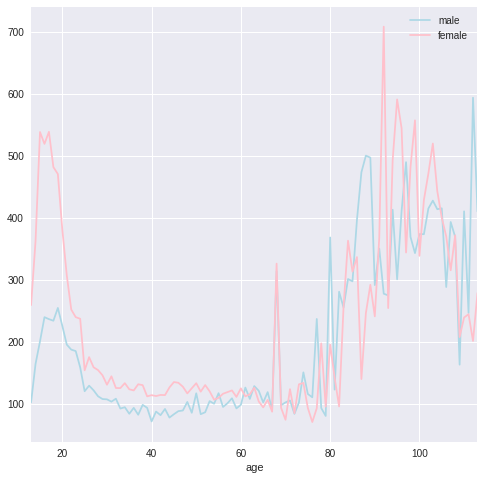

In [17]:
fig, ax = plt.subplots(1)

pf[pf.gender=='male'].groupby('age').friend_count.mean().plot.line(x='age', y='friend_count', ax=ax, color='lightblue')
pf[pf.gender=='female'].groupby('age').friend_count.mean().plot.line(x='age', y='friend_count', ax=ax, color='pink')
ax.legend(('male', 'female'));

## Summarizing on a third variable

  Write code to create a new data frame,
  called 'pf.fc_by_age_gender', that contains
  information on each age AND gender group.

  The data frame should contain the following variables:

     mean_friend_count,
     median_friend_count,
     n (the number of users in each age and gender grouping)

  Here is an example of the structure of your data frame. Your
  data values will be different. Note that if you are grouping by
  more than one variable, you will probably need to call the
  ungroup() function. 

    age gender mean_friend_count median_friend_count    n
  1  13 female          247.2953                 150  207
  2  13   male          184.2342                  61  265
  3  14 female          329.1938                 245  834
  4  14   male          157.1204                  88 1201

In [18]:
%%R
pf.fc_by_age_gender <- group_by(subset(pf, !is.na(gender)), age, gender)

pf.fc_by_age_gender <- summarise(pf.fc_by_age_gender,
                                mean_friend_count = mean(friend_count),
                                median_friend_count = median(friend_count),
                                n = n())
#pf.fc_by_age_gender = ungroup(pf.fc_by_age_gender)
pf.fc_by_age_gender

Source: local data frame [202 x 5]
Groups: age [?]

     age gender mean_friend_count median_friend_count     n
   <int> <fctr>             <dbl>               <dbl> <int>
1     13 female          259.1606               148.0   193
2     13   male          102.1340                55.0   291
3     14 female          362.4286               224.0   847
4     14   male          164.1456                92.5  1078
5     15 female          538.6813               276.0  1139
6     15   male          200.6658               106.5  1478
7     16 female          519.5145               258.5  1238
8     16   male          239.6748               136.0  1848
9     17 female          538.9943               245.5  1236
10    17   male          236.4924               125.0  2045
# ... with 192 more rows


### Alternative with chained commands

In [19]:
%%R
pf.fc_by_age_gender <- pf %>%
  filter(!is.na(gender)) %>%
  group_by(age, gender) %>%
  summarise(mean_friend_count = mean(friend_count),
            median_friend_count = median(friend_count),
            n()) 
 # ungroup() It looks like it is not necessary

pf.fc_by_age_gender 

Source: local data frame [202 x 5]
Groups: age [?]

     age gender mean_friend_count median_friend_count `n()`
   <int> <fctr>             <dbl>               <dbl> <int>
1     13 female          259.1606               148.0   193
2     13   male          102.1340                55.0   291
3     14 female          362.4286               224.0   847
4     14   male          164.1456                92.5  1078
5     15 female          538.6813               276.0  1139
6     15   male          200.6658               106.5  1478
7     16 female          519.5145               258.5  1238
8     16   male          239.6748               136.0  1848
9     17 female          538.9943               245.5  1236
10    17   male          236.4924               125.0  2045
# ... with 192 more rows


In [20]:
# In Pandas - I found a way to name the columns directly
pf_grouped = pf.groupby(['age', 'gender'])
pf_fc_by_age_gender = pf_grouped.friend_count.agg({'mean_friend_count': np.mean,
                                                   'median_friend_count': np.median,
                                                    'n': len})
pf_fc_by_age_gender.head()

mean_friend_count  median_friend_count     n
age gender                                              
13  female         259.160622                148.0   193
    male           102.134021                 55.0   291
14  female         362.428571                224.0   847
    male           164.145640                 92.5  1078
15  female         538.681299                276.0  1139

## Plot the line plot

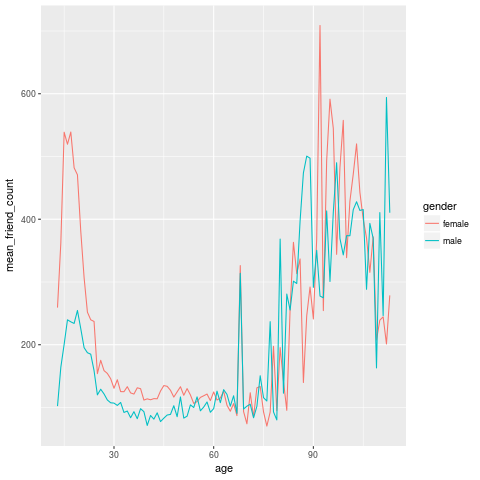

In [21]:
%%R
ggplot(aes(x=age, y=mean_friend_count, color = gender), data = pf.fc_by_age_gender) + 
  geom_line()

In [22]:
pf_fc_by_age_gender.index.levels[1]

Index(['female', 'male'], dtype='object', name='gender')

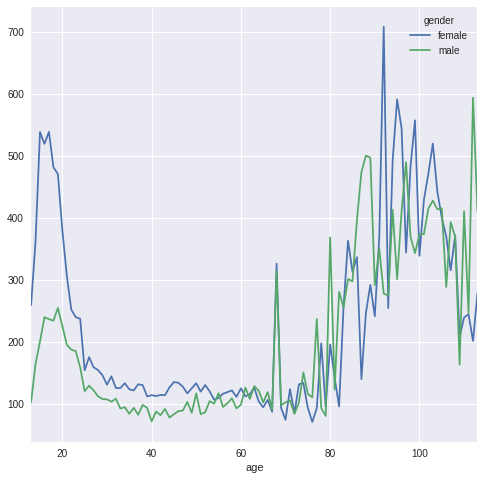

In [23]:
#Pandas - The gender subindex has to be unstacked first
ax = pf_fc_by_age_gender.mean_friend_count.unstack(level=1).plot(subplots=False)

In [24]:
# And this is how it looks unstacked - Interesting!
pf_fc_by_age_gender.mean_friend_count.unstack(level=1) # this is wiide format

gender,female,male
age,,
13,259.160622,102.134021
14,362.428571,164.145640
15,538.681299,200.665765
16,519.514540,239.674784
17,538.994337,236.492421
18,481.979381,233.918329
19,470.800747,254.584052
20,380.824449,225.592122
21,307.106367,195.320771


# Reshaping Data

In [25]:
%%R
library(reshape2)
pf.fc_by_age_gender.wide <- dcast(pf.fc_by_age_gender,
                                  age ~ gender,
                                  value.var = 'median_friend_count')
pf.fc_by_age_gender.wide

    age female  male
1    13  148.0  55.0
2    14  224.0  92.5
3    15  276.0 106.5
4    16  258.5 136.0
5    17  245.5 125.0
6    18  243.0 122.0
7    19  229.0 130.0
8    20  190.0 112.0
9    21  158.0 108.0
10   22  124.0  97.0
11   23  106.5  86.0
12   24  112.0  84.0
13   25   78.0  55.0
14   26   82.0  70.0
15   27   81.0  68.0
16   28   79.0  62.0
17   29   77.0  62.0
18   30   76.5  61.0
19   31   76.0  57.0
20   32   73.0  56.0
21   33   66.0  48.0
22   34   74.0  53.0
23   35   76.5  40.0
24   36   64.0  43.0
25   37   68.0  40.0
26   38   72.0  42.0
27   39   50.0  46.0
28   40   64.0  39.0
29   41   58.0  40.0
30   42   55.0  46.0
31   43   60.0  40.5
32   44   67.5  44.0
33   45   61.0  42.0
34   46   69.5  45.0
35   47   70.5  49.0
36   48   70.5  46.0
37   49   76.0  43.0
38   50   64.5  49.0
39   51   68.0  45.0
40   52   64.0  47.0
41   53   67.5  51.5
42   54   61.0  54.5
43   55   72.0  50.5
44   56   65.0  47.0
45   57   72.0  56.0
46   58   68.0  50.0
47   59   62.

In [26]:
# Let's try this another way
pf.pivot_table(index='age', columns='gender', values='friend_count', aggfunc=np.median) # Pivot_table aggregates with mean as default

gender,female,male
age,,
13,148.0,55.0
14,224.0,92.5
15,276.0,106.5
16,258.5,136.0
17,245.5,125.0
18,243.0,122.0
19,229.0,130.0
20,190.0,112.0
21,158.0,108.0


In [27]:
#It is possible to do this with crosstab as well
pd.crosstab(pf.age, pf.gender, values=pf.friend_count, aggfunc=np.median)
# Note that we start at the original dataframe here

gender,female,male
age,,
13,148.0,55.0
14,224.0,92.5
15,276.0,106.5
16,258.5,136.0
17,245.5,125.0
18,243.0,122.0
19,229.0,130.0
20,190.0,112.0
21,158.0,108.0


## Ratio Plot

  Plot the ratio of the female to male median
  friend counts using the data frame
  pf.fc_by_age_gender.wide.

  Think about what geom you should use.
  Add a horizontal line to the plot with
  a y intercept of 1, which will be the
  base line. Look up the documentation
  for geom_hline to do that. Use the parameter
  linetype in geom_hline to make the
  line dashed.

  The linetype parameter can take the values 0-6:
  0 = blank, 1 = solid, 2 = dashed
  3 = dotted, 4 = dotdash, 5 = longdash
  6 = twodash

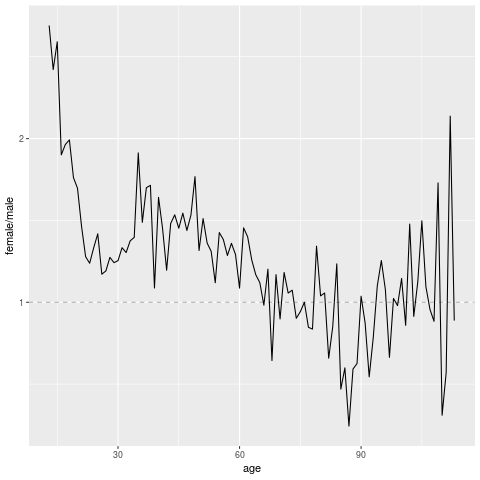

In [28]:
%%R
ggplot(aes(x = age, y = female/male), data = pf.fc_by_age_gender.wide) + 
  geom_line() + 
  #create a reference line over at 1 
  geom_hline(yintercept = 1, alpha = 0.3, linetype = 2)

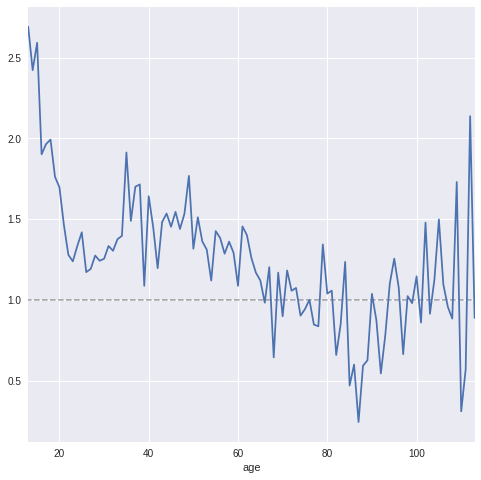

In [29]:
#Pandas
pf_wide = pd.crosstab(pf.age, pf.gender, values=pf.friend_count, aggfunc=np.median)

#Let's try dividing it directly
ax = (pf_wide.female/pf_wide.male).plot()
#plot an intercept line
ax.hlines(y=1,xmin=0, xmax=150, linestyles='dashed', alpha=0.3 ); # It works nicely!

#    Third Quantitative Variable

  Create a variable called year_joined
  in the pf data frame using the variable
  tenure and 2014 as the reference year.

  The variable year joined should contain the year
  that a user joined facebook.

In [30]:
%%R
pf$year_joined  <- floor(2014 - pf$tenure/360)
pf

       userid age dob_day dob_year dob_month gender tenure friend_count
1     2094382  14      19     1999        11   male    266            0
2     1192601  14       2     1999        11 female      6            0
3     2083884  14      16     1999        11   male     13            0
4     1203168  14      25     1999        12 female     93            0
5     1733186  14       4     1999        12   male     82            0
6     1524765  14       1     1999        12   male     15            0
7     1136133  13      14     2000         1   male     12            0
8     1680361  13       4     2000         1 female      0            0
9     1365174  13       1     2000         1   male     81            0
10    1712567  13       2     2000         2   male    171            0
11    1612453  13      22     2000         2   male     98            0
12    2104073  13       1     2000         2   male     55            0
13    1918584  13       5     2000         3   male    106      

In [32]:
#Pandas
pf['year_joined'] = np.floor(2014 - pf.tenure/360)
#make it an integer - it can not be done, see: https://pandas.pydata.org/pandas-docs/stable/gotchas.html
pf.loc[~pf.year_joined.isnull(), 'year_joined'] = pf.year_joined[~pf.year_joined.isnull()].astype(int)
pf

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,2013.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,2013.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,2013.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,2013.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,2013.0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0,2013.0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0,2013.0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0,2014.0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0,2013.0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0,2013.0


# Cut a Variable

In [128]:
%%R
summary(pf$year_joined)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2005    2012    2012    2012    2013    2014       2 


In [33]:
pf.year_joined.describe()

count    99001.000000
mean      2011.981758
std          1.273550
min       2005.000000
25%       2012.000000
50%       2012.000000
75%       2013.000000
max       2014.000000
Name: year_joined, dtype: float64

In [34]:
%%R
#get the count per year
table(pf$year_joined)


 2005  2006  2007  2008  2009  2010  2011  2012  2013  2014 
   10    18   663  1644  4612  5461 10037 33568 42918    70 


In [41]:
table = pf.year_joined.value_counts().sort_index()
table

2005.0       10
2006.0       18
2007.0      663
2008.0     1644
2009.0     4612
2010.0     5461
2011.0    10037
2012.0    33568
2013.0    42918
2014.0       70
Name: year_joined, dtype: int64

  Create a new variable in the data frame
  called year_joined.bucket by using
  the cut function on the variable year_joined.

  You need to create the following buckets for the
  new variable, year_joined.bucket

         (2004, 2009]
         (2009, 2011]
         (2011, 2012]
         (2012, 2014]

  Note that a parenthesis means exclude the year and a
  bracket means include the year.

In [42]:
%%R
pf$year_joined.bucket = cut(pf$year_joined, c(2004, 2009, 2011, 2012, 2014)) 
table(pf$year_joined.bucket)


(2004,2009] (2009,2011] (2011,2012] (2012,2014] 
       6947       15498       33568       42988 


In [45]:
#pandas
pf['year_joined_bucket'] = pd.cut(pf.year_joined, (2004, 2009, 2011, 2012, 2014))
pf.year_joined_bucket.value_counts(sort=False)

(2004, 2009]     6947
(2009, 2011]    15498
(2011, 2012]    33568
(2012, 2014]    42988
Name: year_joined_bucket, dtype: int64